## 회귀

앞선 3장까지는 모델과 훈련 알고리즘을 블랙박스 취급.  
내부적으로 어떻게 작동하는지 몰라도 어느정도 일을 처리할 수 있고 실제로도 구현의 상세사항을 구체적으로 알 필요는 없다.

하지만 어떻게 작동하는지 잘 이해하고 있으면 *'적절한 모델, 올바른 훈련 알고리즘, 작업에 맞는 좋은 하이퍼파리미터'* 를 빠르게 찾을 수 있다.

4장 **회귀** 파트는 뒤에서 배울 신경망을 이해하고 구축하고 훈련시키는데 필수적인 내용

### Index

1. 선형 회귀
2. 경사 하강법 
      - 배치 경사 하강법  
      - 확률적 경사 하강법  
      - 미니배치 경사 하강법  
3. 다항 회귀
4. 학습 곡선
5. 규제가 있는 선형 모델
      - 릿지 회귀  
      - 라쏘 회귀  
      - 엘라스틱 넷  
      - 조기 종료  
6. 로지스틱 회귀
      - 확률 추정  
      - 훈련과 비용 함수  
      - 결정 경계  
      - 소프트맥스 회귀  

### 4.1 선형회귀

#### 4.1.1 정규방정식

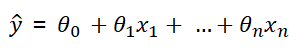

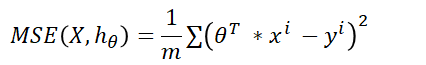

In [23]:
import numpy as np
X = 2 * np.random.rand(100, 1) #0 과 100사이에 무작위로 난수 추출후 X 2
y = 4 + 3 * X + np.random.randn(100, 1) # 4+ 3x + bias 형태 bias는 표준정규분포를 따르는 샘플 100

In [35]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

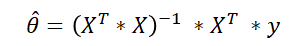

In [36]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.82817992],
       [10.03847811]])

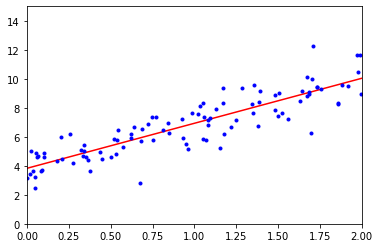

In [38]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

#### 4.1.2 계산 복잡도

정규방정식의 역행렬을 계산하는 계산 복잡도는 일반적으로 𝑂(𝑛^2.4 )과 𝑂(𝑛^3) 사이 즉, 특성 수가 두배로 늘어나면 계산시간이 5~8배 정도씩 지수적으로 증가

또한, 데이터 샘플 수에 대한 계산 복잡도는 선형적으로 증가

정리하면

**특성수가 너무 많은경우 계산 복잡도가 지수적으로 올라가 정규방정식으로 해결 불가**  
**특성수는 적은데 데이터가 많은경우 저장 메모리공간만 허락한다면 큰 데이터셋도 쉽게 처리 및 예측 가능**

### 4.2 경사 하강법

비용 함수 최소화를 위해 반복해서 파라미터를 조정해가는 것.

*gradient descent의 목표*

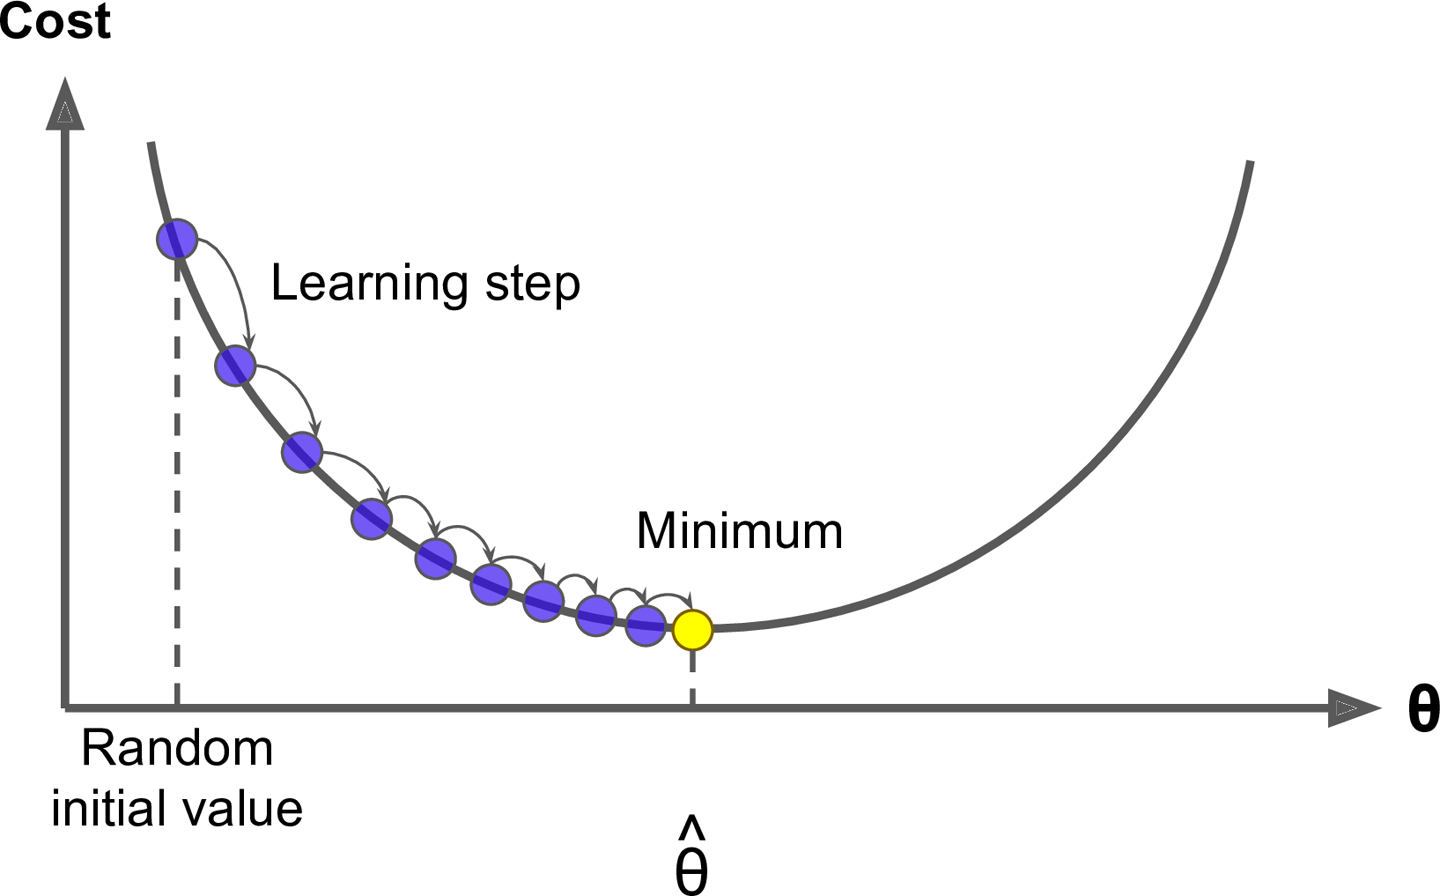

*학습률이 너무 적은 gradient descent*  
수렴속도가 너무느리다

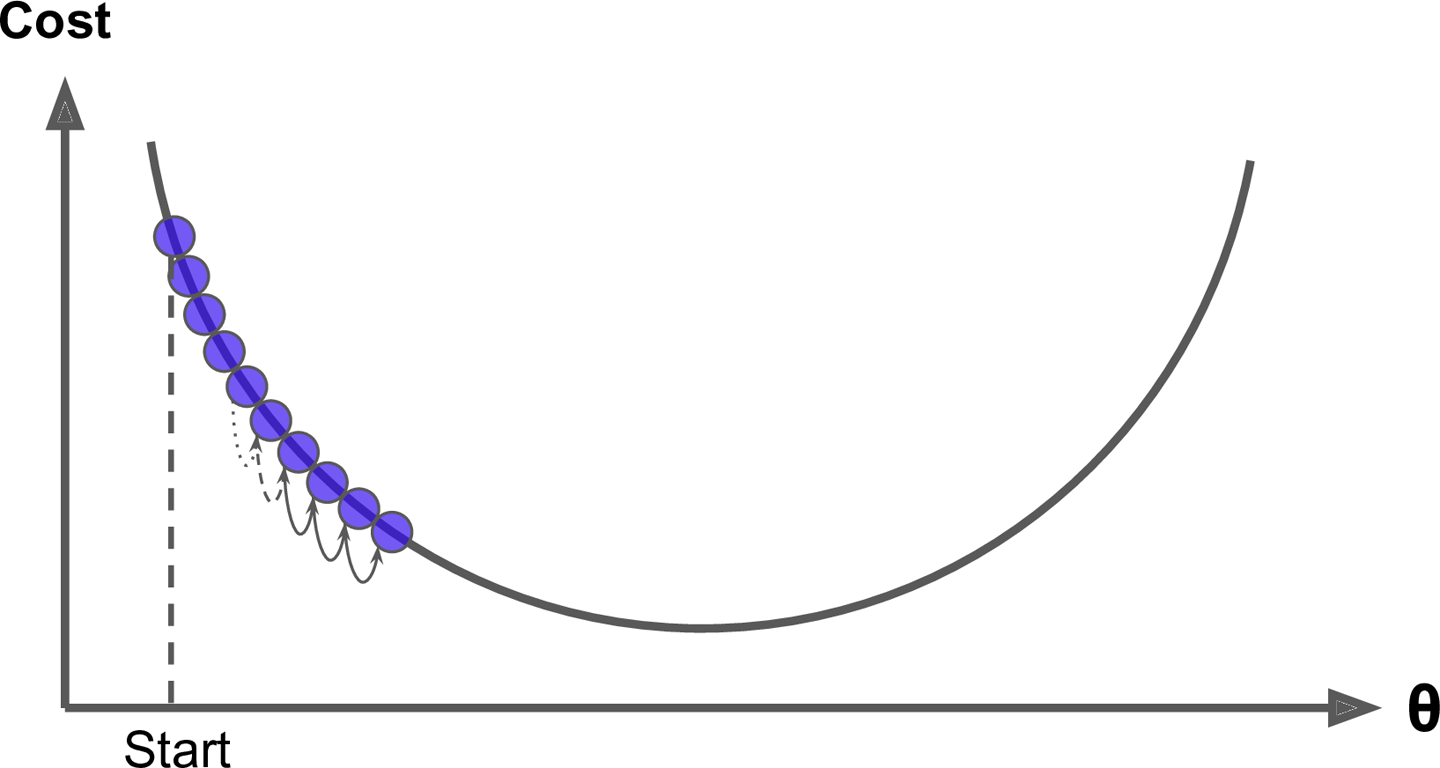

*학습률이 너무 큰 gradient descent*  
발산의 위험이있다.

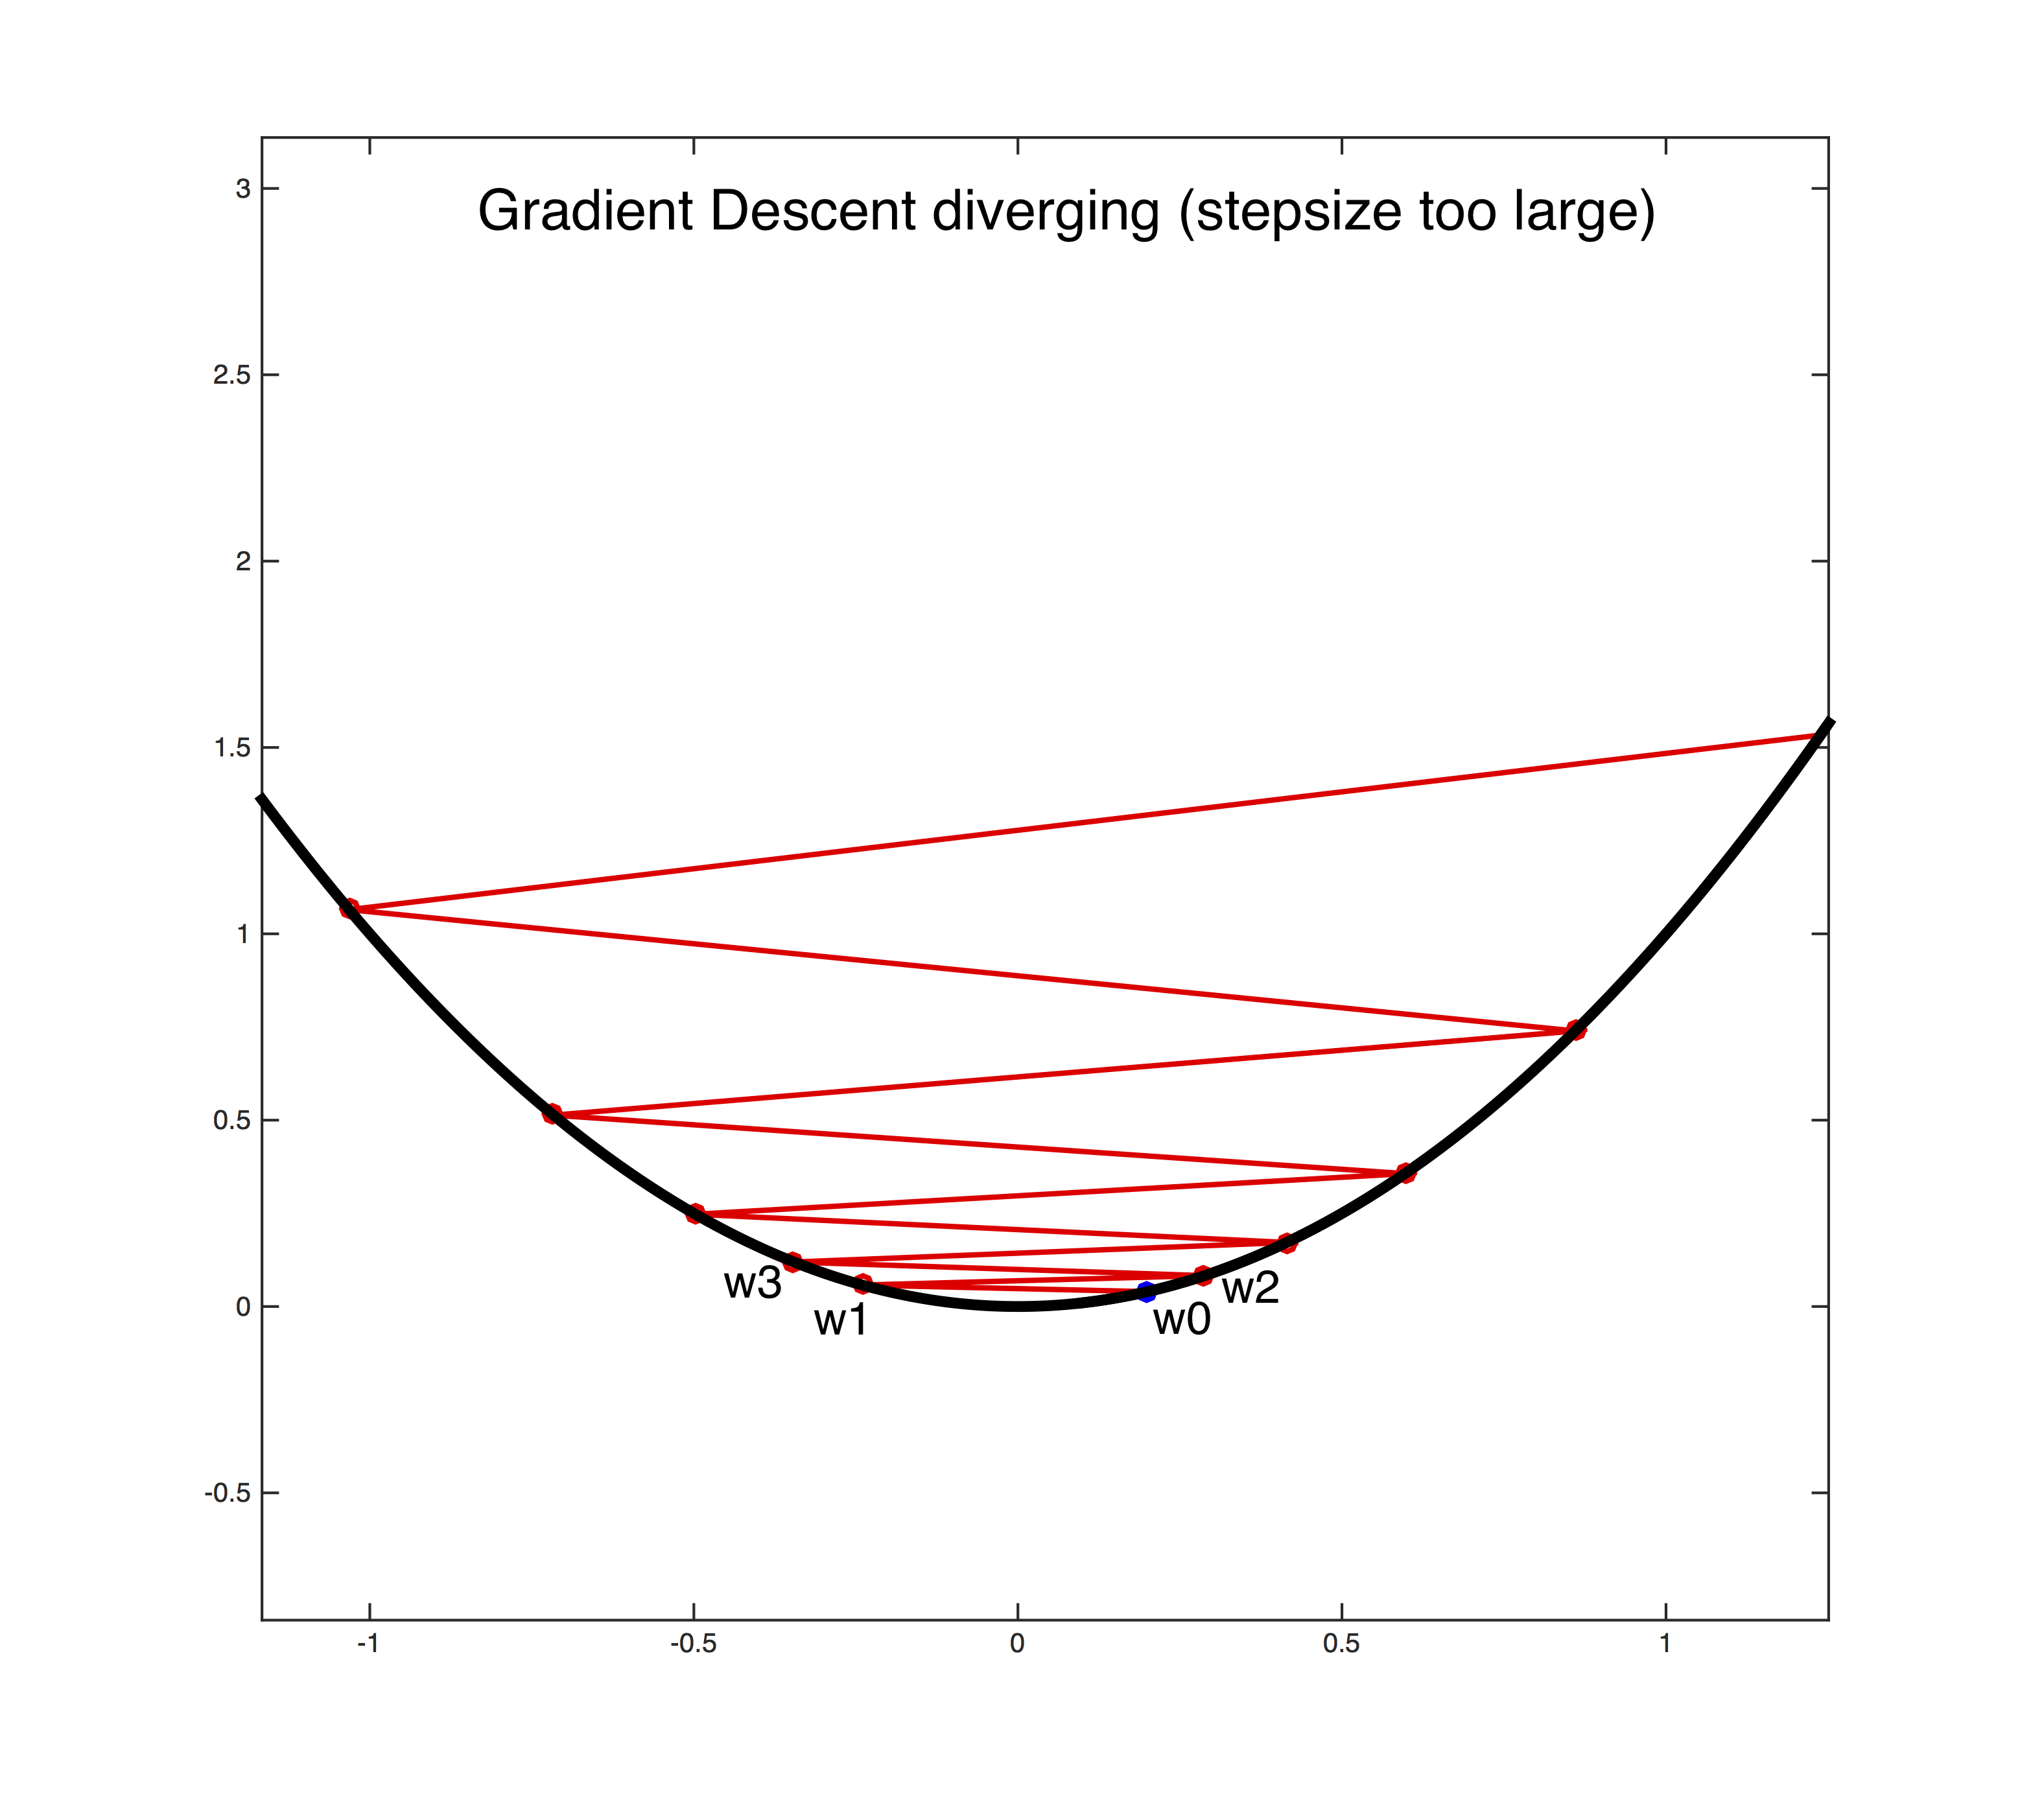

*실제 복잡한 gradient descent*  
값 초기화의 영향으로 local minimum에 빠질 우려가있다.

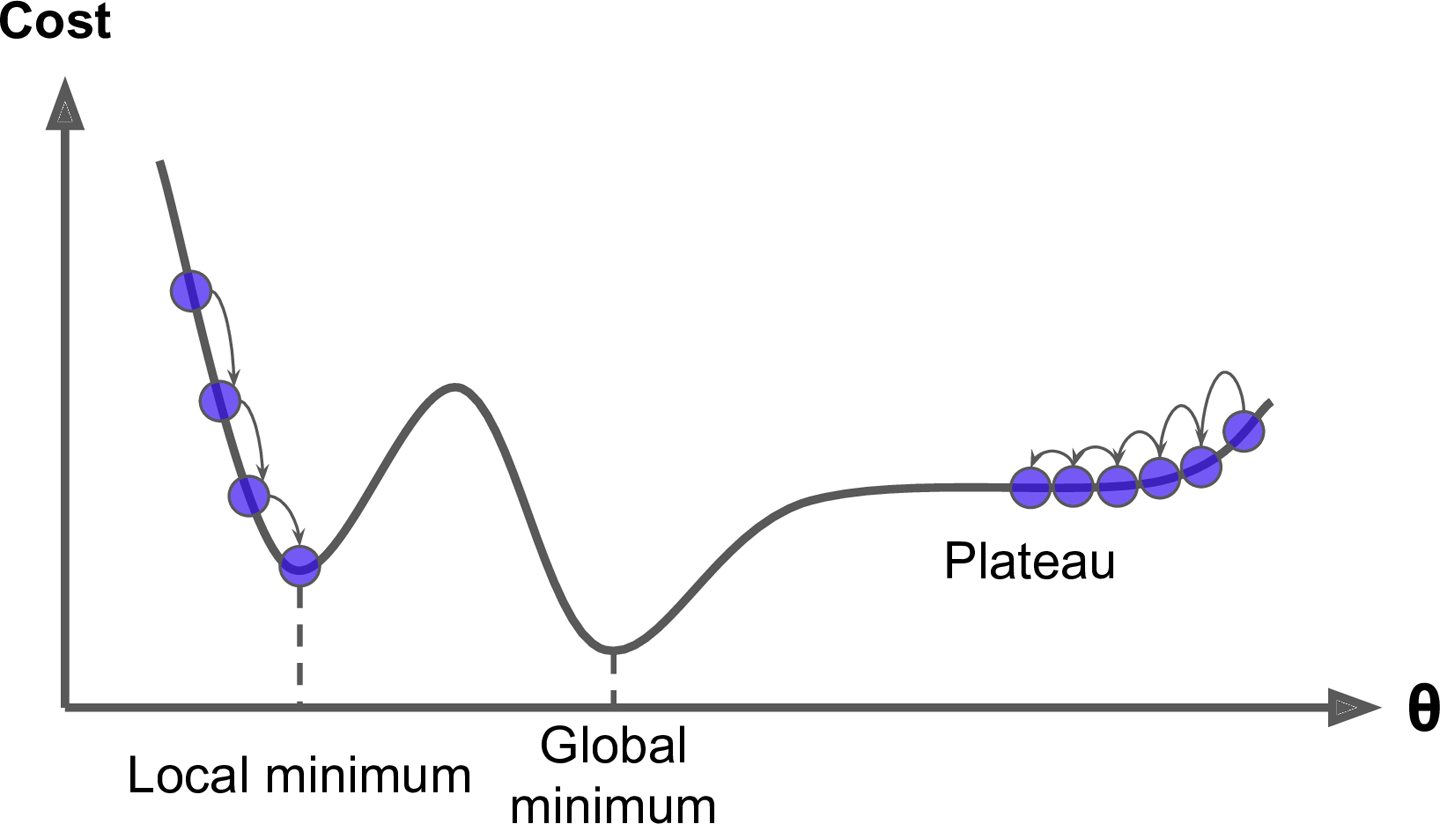

*특성 스케일에 따른 gradient descent*

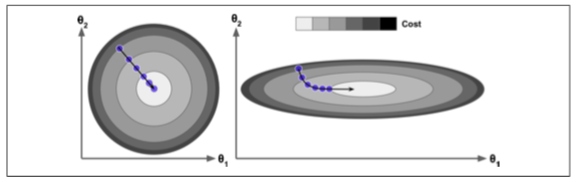

결국 모델훈련은 하파미터의 최솟값을 찾는 과정!

#### 4.2.1 배치 경사 하강법

편미분을 이용해서 모든 파라미터에 대해 편도함수를 구한다.

이 방법은 매 경사 하강법 스텝에서 전체 훈련 세트 X에 대해서 계산한다.  
그래서 **배치 경사 하강법**이라고 한다.  
즉, 매 스텝에서 훈련 데이터 전체를 사용하기 때문에 매우 큰 훈련세트에서는 아주 느리다.  
대신에 경사 하강법은 특성수에 민감하지 않기 때문에  
수십만개의 특성에서 선형회귀를 훈련시키려면 정규방정식보다 경사하강법이 빠르다.

*경사하강법의 스텝*

$\theta^{next step} = \theta - \eta  d\theta MSE(\theta)$

*경사하강법의 구현*

In [43]:
eta = 0.1 # 학습률 (learning rate)
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [44]:
theta

array([[3.82817992],
       [3.10514909]])

In [45]:
theta_best

array([[3.82817992],
       [3.10514909]])

경사하강법으로 찾은 theta와 정규방정식으로 찾은 theta_best값이 정확히 일치!

**학습률에 따른 선형회귀에서의 gradient descent**

In [52]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path = None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration >0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize = 18)
    plt.axis([0,2,0,15])
    plt.title(r"$\eta = {}$".format(eta), fontsize = 18)

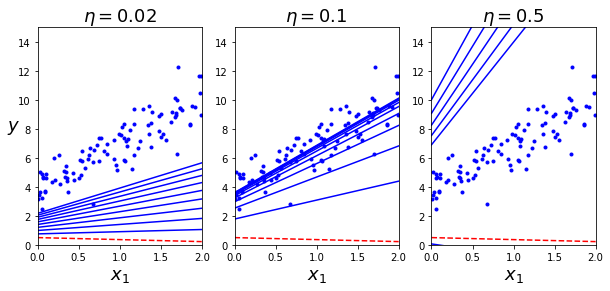

In [59]:
np.random.seed(42)
theta = np.random.randn(2,1) # random initialization

plt.figure(figsize = (10,4))
plt.subplot(131); plot_gradient_descent(theta, eta = 0.02)
plt.ylabel("$y$", rotation =0, fontsize = 18)
plt.subplot(132); plot_gradient_descent(theta, eta = 0.1, theta_path = theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta = 0.5)

plt.show()

* 학습률이 너무 낮으면 알고리즘은 최적점에 도달하겠지만 시간이 너무 오래걸린다.
* 가운데는 학습률이 적당해 보인다. 반복 몇번만에 최적점에 수렴했다.
* 오른쪽은 학습률이 너무 높다. 발산한다.

**반복횟수는 너무작으면 최적점 도달하기전에 알고리즘이 멈추고 너무 크면 모델 파라미터가 더이상 변하지 않는 동안 시간을 낭비하게 된다. 간단한 해결책은 반복 횟수를 아주 크게 지정하고 그래디언트 벡터가 아주 작아지면 ($\epsilon$ 보다 작아지면) 경사 하강법이 거의 최솟값이 도달한것이므로 알고리즘을 중지하는 것이다.**

### 확률적 경사 하강법
